In [156]:
import torch as torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# repres = []
# gt = []
# label = []
# for i in range(11):
#     repres.append(torch.load(f"/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_{i}.pt").numpy())
#     gt.append(torch.load(f"/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_{i}.pt").numpy())
#     label.append(np.load(f"/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_{i}.npy"))
# repres = np.concatenate(repres)
# gt = np.concatenate(gt)
# label = np.concatenate(label)

repres = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_0.pt").numpy()
gt = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_0.pt").numpy()
label = np.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_0.npy")

# repres = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_uniformity19_0.pt").numpy()
# gt = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_uniformity19_0.pt").numpy()
# label = np.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_uniformity19_0.npy")

# repres = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_dropout23_0.pt").numpy()
# gt = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_dropout23_0.pt").numpy()
# label = np.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_dropout23_0.npy")

# repres = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_unitrepre37_0.pt").numpy()
# gt = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_unitrepre37_0.pt").numpy()
# label = np.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_unitrepre37_0.npy")

# repres = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/repres_alignment44_0.pt").numpy()
# gt = torch.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/gt_alignment44_0.pt").numpy()
# label = np.load("/home/zzx/quant/TOIS19_pytorch/TGC_torch/temp/repres/weight_mask_alignment44_0.npy")


repres.shape

(1026, 133)

In [157]:
def plot_easy_hard(data):
    fig = plt.figure()      # 创建图形实例
    ax = plt.subplot(111)       # 创建子图
    # 遍历所有样本
    for i in range(data.shape[0]):
        # 在图中为每个数据点画出标签
        if label[i]==0:
            plt.text(data[i, 0], data[i, 1], str(int(label[i])), color=plt.cm.Set1(label[i]),
                    fontdict={'size': 3})
        else:
            plt.text(data[i, 0], data[i, 1], str(int(label[i])), color=plt.cm.Set1(label[i]),
                    fontdict={'size': 7})
    plt.xlim((np.min(data,0)[0], np.max(data,0)[0]))
    plt.ylim((np.min(data,0)[1], np.max(data,0)[1]))

    plt.xticks()        # 指定坐标的刻度
    plt.yticks()
    return fig

def plot_embedding_heatmap(data, label, title, mask):
    # 去除一下outliers  看下数据的分布的情况
    fig = plt.figure()      # 创建图形实例
    ax = plt.subplot(111)       # 创建子图  
    # 去除label中的离群值 再重新画 暂定为排序从5%-95%
    temp = np.sort(label)
    lower_value = temp[int(len(label)*0.05)]
    upper_value = temp[int(len(label)*0.95)]
    new_mask = (label>lower_value)*(label<upper_value)
    scatter = ax.scatter(data[:,0][new_mask].squeeze(), data[:,1][new_mask].squeeze(), c=label[new_mask], cmap='coolwarm', alpha=0.7,)
    # scatter = ax.scatter(data[:,0].squeeze(), data[:,1].squeeze(), c=label, cmap='coolwarm', alpha=0.7,)
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
    legend2 = ax.legend(handles, labels, loc="upper right", title="Colors")
    plt.title(title, fontsize=14)
    return fig

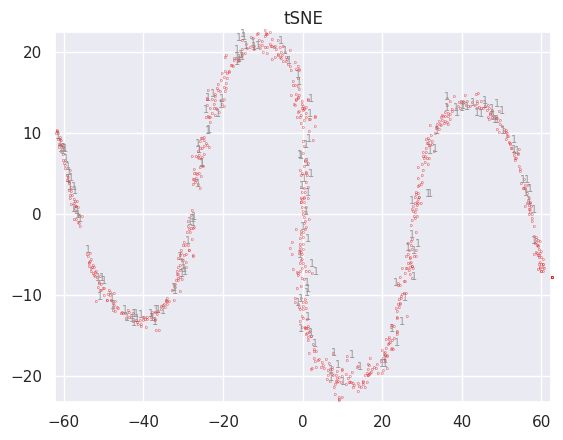

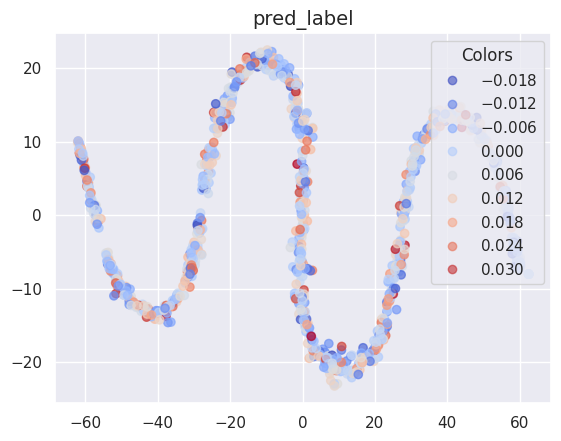

In [158]:
ts = TSNE(n_components=2, init='pca', random_state=0)
data = ts.fit_transform(repres)

fig = plot_easy_hard(data)
plt.title("tSNE")
plt.show()
fig = plot_embedding_heatmap(data=data, label=gt.squeeze(),mask=label, title='pred_label')
plt.show()

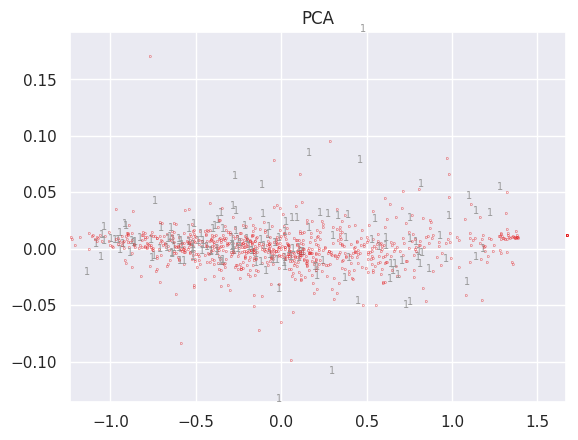

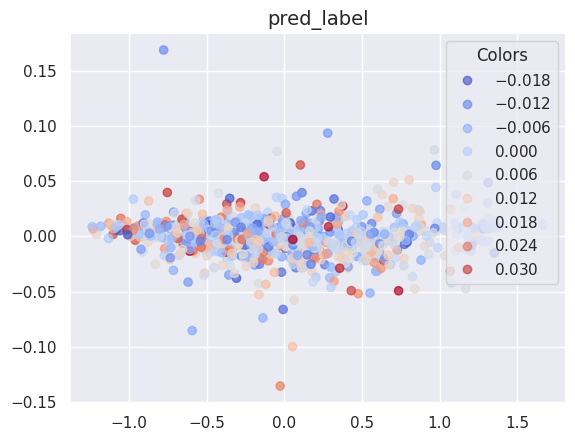

In [159]:
pca = PCA(n_components=2)
data = pca.fit_transform(repres)

fig = plot_easy_hard(data)
plt.title("PCA")
plt.show()
fig = plot_embedding_heatmap(data=data, label=gt.squeeze(),mask=label, title='pred_label')
plt.show()

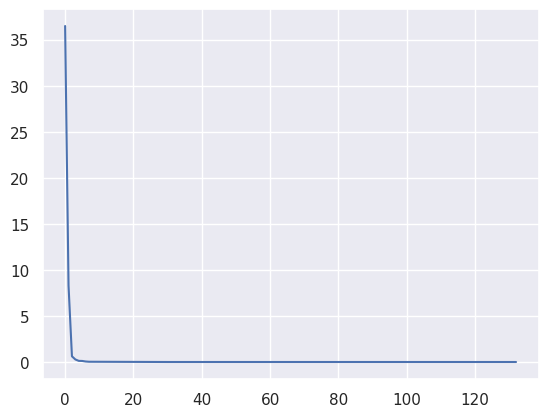

[3.64864655e+01 8.30551624e+00 6.18367791e-01 2.75396317e-01
 1.24078862e-01 1.14105545e-01 5.57564273e-02 2.82432344e-02
 2.65370067e-02 2.03465484e-02 1.53143648e-02 1.23768039e-02
 8.67508538e-03 7.75807770e-03 5.73131628e-03 5.56160836e-03
 5.06198034e-03 3.98878101e-03 3.28814238e-03 2.78105191e-03
 2.43918155e-03 2.22670031e-03 2.20194366e-03 1.52544316e-03
 1.44331402e-03 1.38519472e-03 9.25646571e-04 8.80250533e-04
 8.56869854e-04 6.85931416e-04 5.13364153e-04 4.63067467e-04
 4.51130036e-04 3.85842635e-04 3.39761726e-04 3.19132145e-04
 2.88142212e-04 2.63454625e-04 2.42382957e-04 2.28288656e-04
 1.98226946e-04 1.84257820e-04 1.57700779e-04 1.47435392e-04
 1.23420192e-04 1.14423958e-04 1.07176944e-04 1.01210062e-04
 9.60028483e-05 8.82226595e-05 8.31696816e-05 6.70519148e-05
 6.54951946e-05 5.99520718e-05 5.35575127e-05 4.48452774e-05
 4.11637884e-05 3.82420876e-05 3.53445357e-05 3.49288312e-05
 3.27694797e-05 3.09124771e-05 2.59955086e-05 2.48966080e-05
 2.38651610e-05 2.189667

In [160]:
def svd(repres):
    c = np.linalg.svd(repres)
    return c[1]
svds = svd(repres)
plt.plot(svds)
plt.show()
svds.shape
print(svds)

[0.5484896  0.53736466 0.7435197  ... 0.84601736 0.65199083 1.0057752 ]


/tmp/ipykernel_249/1159276877.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(norm, hist=True, kde=False)


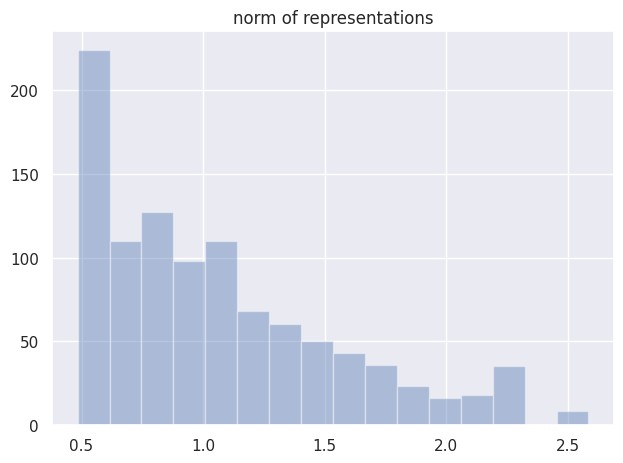

In [161]:
# 这里分析一下 repres里面的大小，角度，pairwise相似性等指标

norm = np.linalg.norm(repres, axis=1)
# norm.shape
print(norm)
import seaborn as sns

sns.set()  #切换到sns的默认运行配置
# sns.distplot(nums,hist=True,norm_hist=False,kde=False,)
sns.distplot(norm, hist=True, kde=False)
#添加x轴和y轴标签
plt.title("norm of representations")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()



In [ ]:
def pair_wise_cos(a,b):
    a_norm = a/np.linalg.norm(a,axis=1)[:, None]
    b_norm = b/np.linalg.norm(b,axis=1)[:, None]
    res = a_norm @ b_norm.T
    return res

coss = pair_wise_cos(repres, repres)
sns.set()  
sns.distplot(coss, hist=True, kde=False)
plt.title("pair wise cosine similarity  negatives")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()

In [ ]:
# 看一下y相近的样本  对应的cosine similarity分布情况
gt.shape

In [ ]:
print((np.abs(gt)<1e-3).sum()/gt.shape[0])  # 有9.25%的股票 价格基本没有变动

# 还是排序找出top20%和tail20%的相似度
diff = np.sort(np.abs(gt-gt.T).reshape(-1))
low_bound = diff[int(len(diff)*0.10)]
high_bound = diff[int(len(diff)*0.90)]
print(low_bound, high_bound)

mask_positives = (np.abs(gt-gt.T))<low_bound  
mask_negatives = (np.abs(gt-gt.T))>high_bound

coss_positives = pair_wise_cos(repres, repres)[np.where(mask_positives==1)]
coss_negatives = pair_wise_cos(repres, repres)[np.where(mask_negatives==1)]

print(coss_positives)
print(coss_negatives)
print(np.mean(coss_positives))
print(np.mean(coss_negatives))
sns.set()  
sns.distplot(coss_positives, hist=True, kde=False)
plt.title("pair wise cosine similarity  positives")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()

sns.set()  
sns.distplot(coss_negatives, hist=True, kde=False)
plt.title("pair wise cosine similarity  negatives")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()



In [ ]:

sns.set()  
sns.distplot(gt, hist=True, kde=False)
plt.title("gt")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()



In [ ]:
# x 相似  即 cos similarity较大
# 
# 还是排序找出top20%和tail20%的相似度
diff = np.sort(coss.reshape(-1))
low_bound = diff[int(len(diff)*0.10)]
high_bound = diff[int(len(diff)*0.90)]
print(low_bound, high_bound)

mask_positives = coss>high_bound
mask_negatives = coss<low_bound

y_diff = np.abs(gt-gt.T)

y_positives = y_diff[np.where(mask_positives==1)]
y_negatives = y_diff[np.where(mask_negatives==1)]

print(y_positives) # 0.016   
print(y_negatives) # 0.021   
print(np.mean(y_positives))
print(np.mean(y_negatives))
sns.set()  
sns.distplot(y_positives, hist=True, kde=False)
plt.title("y  positives")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()

sns.set()  
sns.distplot(y_negatives, hist=True, kde=False)
plt.title("y  negatives")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()



In [ ]:
# 下面研究一下如何把表征限制在单位球面上   这一点也很重要
# 直接在前向传播时除以自身的模长



